In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
from collections import OrderedDict

import ipyparallel as ipp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

import MESS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load up the trained  RF Classifier and Regressor

In [6]:
trained_cla = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/cv_classify_results/rf.mdl"
cla = MESS.inference.Ensemble.load(infile=trained_cla)
print(cla.classification_report)

              precision    recall  f1-score   support

 competition       0.83      0.78      0.81      2657
   filtering       0.78      0.74      0.76      2868
     neutral       0.80      0.89      0.85      2903

   micro avg       0.81      0.81      0.81      8428
   macro avg       0.81      0.81      0.80      8428
weighted avg       0.81      0.81      0.80      8428



## We're gonna work up the empirical figure using simulated data.


In [19]:
cla_preds_df = pd.DataFrame()
emp_coms = OrderedDict({"Mauritius_weevils":12, "Reunion_weevils":13, "Reunion_spiders":50, "Trees_1":52, "Trees_2":47})
for name, n in emp_coms.items():
    synthetic_df = MESS.util.synthetic_community(nspecies=n)
    ## Have to include the fake metacommunity_traits here so all the trait
    ## stats will be calculated, to take the same form as the simulations.
    cla.set_data(empirical_df=synthetic_df, metacommunity_traits=synthetic_df["trait"]*2)
    cla_pred = cla.predict()[1]
    cla_pred.index = [name]
    cla_preds_df = pd.concat([cla_preds_df, cla_pred])
print(cla_preds_df)

                   competition  filtering   neutral
Mauritius_weevils     0.019583   0.143750  0.836667
Trees_1               0.022917   0.184583  0.792500
Trees_2               0.040000   0.192500  0.767500
Reunion_spiders       0.020000   0.108750  0.871250
Reunion_weevils       0.085833   0.144583  0.769583


## Plot classification probabilities

[None, None, None, None, None, None, None, None, None, None]

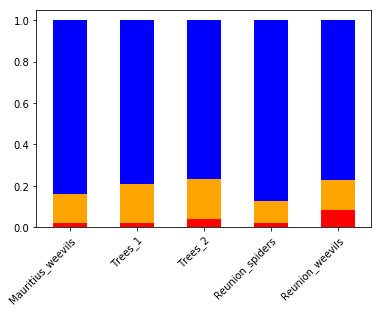

In [25]:
ax = cla_preds_df.plot.bar(stacked=True, legend=False, color=['r', 'orange', 'b'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

## Load the regressor and estimate parameters
Using the gb regressor here so we can get prediction intervals.

In [48]:
## Use the real models trained on tons of sims
trained_rgr = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/cv_predict_results/rfq/neutral.mdl"
rgr = MESS.inference.Ensemble.load(infile=trained_rgr)


In [146]:
## Use a dummy rgr trained on toy data for testing

## Create a fake toy community df
synthetic_df = MESS.util.synthetic_community(nspecies=n)
## Make the regressor
rgr = MESS.inference.Regressor(empirical_df=synthetic_df, simfile=simfile, target_model="neutral",\
                                metacommunity_traits=synthetic_df["trait"]*2, algorithm="rfq")
## Train and predict
rgr.predict(select_features=True, param_search=False, quick=True, verbose=True)

Selecting features:
  alpha	['abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'mean_pi', 'std_pi', 'median_pi', 'iqr_pi', 'mean_dxys', 'std_dxys', 'skewness_dxys', 'median_dxys', 'iqr_dxys', 'kurtosis_local_traits', 'iqr_local_traits', 'iqr_regional_traits', 'reg_loc_iqr_trait_dif', 'abundance_dxy_cor', 'abundance_pi_cor', 'dxy_pi_cor']
  ecological_strength	[]
  NB: No features found relevant for target ecological_strength
      Fall back to using all parameters.
  J	['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_dxys', 'std_dxys', 'median_dxys', 'iqr_dxys', 'trait_h1', 'trait_h2', 'trait_h3', 'trait_h4']
  m	['S', 'pi_h1', 'pi_h2', 'pi_h3', 'pi_h4', 'mean_dxys', 'std_dxys', 'skewness_dxys', 'median_dxys', 'iqr_dxys', 'trait_h1', 'iqr_local_traits', 'kurtosis_regional_traits', 'iqr_regional_traits', 'reg_loc_kurtosis_trait_dif', 'dxy_pi_cor', 'SGD_0', 'SGD_1']
  generation	['S', 'abund_h3', 'abund_h4', 'std_dxys', 'skewness_dxys', 'iqr_d

AttributeError: 'Regressor' object has no attribute 'cv_stats'

In [155]:
rgr_preds = OrderedDict()

for name, n in emp_coms.items():
    synthetic_df = MESS.util.synthetic_community(nspecies=n)
    ## Have to include the fake metacommunity_traits here so all the trait
    ## stats will be calculated, to take the same form as the simulations.
    rgr.set_data(empirical_df=synthetic_df, metacommunity_traits=synthetic_df["trait"]*2)
    rgr_pred = rgr.predict()
    rgr_preds[name] = rgr_pred
[display(x) for x in rgr_preds.values()]

,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8556.1,0.400803,1795.9,0.002589,1529.1,0.000775,0.893966
lower 0.025,6047.0,0.006050,1476.0,0.001069,845.0,0.000510,0.857180
upper 0.975,9718.0,0.983400,3773.0,0.005060,1957.0,0.001479,0.984750


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,7940.0,0.434292,4397.3,0.005241,845.1,0.001628,0.985249
lower 0.025,5577.0,0.001153,2555.0,0.002450,562.0,0.000640,0.951880
upper 0.975,9978.0,0.906110,6700.0,0.007020,1109.0,0.003760,0.997790


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8238.5,0.341416,4792.4,0.005137,888.3,0.001603,0.951415
lower 0.025,6475.0,0.001290,2358.0,0.002780,562.0,0.000760,0.923010
upper 0.975,9903.0,0.906110,8832.0,0.006900,1326.0,0.003760,0.970540


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8747.4,0.266052,4957.9,0.006382,871.9,0.001492,0.984181
lower 0.025,5577.0,0.004760,2932.0,0.003450,562.0,0.000572,0.951880
upper 0.975,9978.0,0.944030,8832.0,0.007950,1053.0,0.003760,0.991960


,alpha,ecological_strength,J,m,generation,speciation_prob,_lambda
estimate,8276.7,0.325434,1910.0,0.001705,1433.2,0.00083,0.886596
lower 0.025,5577.0,0.001290,1409.0,0.001021,839.0,0.00051,0.814390
upper 0.975,9995.0,0.987380,3773.0,0.002515,1957.0,0.00156,0.930120


[None, None, None, None, None]

In [144]:
simfile = "/home/iovercast/Continuosity/MESS/analysis/figure5-sims/fig5_sims/SIMOUT.txt"
rgrt = MESS.inference.Regressor(empirical_df=synthetic_df, simfile=simfile, target_model="neutral",\
                                metacommunity_traits=synthetic_df["trait"]*2, algorithm="gb")
rgrt.predict(select_features=True, param_search=False, quick=True, verbose=True)

Selecting features:
  alpha	['abund_h1', 'mean_pi', 'std_pi', 'iqr_pi', 'std_dxys', 'skewness_dxys', 'iqr_dxys', 'kurtosis_local_traits', 'reg_loc_kurtosis_trait_dif', 'reg_loc_iqr_trait_dif', 'abundance_dxy_cor', 'abundance_pi_cor']
  J	['S', 'abund_h1', 'abund_h2', 'abund_h3', 'abund_h4', 'pi_h1', 'mean_dxys', 'std_dxys', 'median_dxys', 'iqr_dxys', 'trait_h4']
All selected features: S abund_h1 abund_h2 abund_h3 abund_h4 pi_h1 mean_pi std_pi iqr_pi mean_dxys std_dxys skewness_dxys median_dxys iqr_dxys trait_h4 kurtosis_local_traits reg_loc_kurtosis_trait_dif reg_loc_iqr_trait_dif abundance_dxy_cor abundance_pi_cor
Calculating prediction interval(s)
	alpha
	J


,alpha,J
estimate,8461.499631,2662.793054
lower 0.025,4266.849320,1218.811856
upper 0.975,9977.993652,7496.388836
